In [14]:
!pip install yfinance==0.2.4
!pip install bs4
!pip install plotly==5.3.1

In [15]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

<h1>Question 1: Use yfinance to Extract Stock Data</h1>

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function.

In [16]:
tesla = yf.Ticker("TSLA")

In [17]:
tesla_share_price_data = tesla.history(period="max")

In [18]:
tesla_share_price_data.reset_index(inplace=True)
tesla_share_price_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


<h1>Question 2: Use Webscraping to Extract Tesla Revenue Data</h1>

Display the last five rows of the tesla_revenue dataframe using the tail function.

In [34]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

In [35]:
soup = BeautifulSoup(html_data,"html5lib")

In [47]:
tesla_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

In [48]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [49]:
tesla_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


<h1>Question 3: Use yfinance to Extract Stock Data</h1>

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function.

In [36]:
GameStop = yf.Ticker("GME")

In [37]:
gme_data = GameStop.history(period="max")

In [38]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


<h1>Question 4: Use Webscraping to Extract GME Revenue Data</h1>

Display the last five rows of the gme_revenue dataframe using the tail function.

In [39]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data  = requests.get(url).text

In [40]:
soup = BeautifulSoup(html_data,"html5lib")

In [41]:
gme_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

In [42]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [43]:
print(gme_revenue)

          Date Revenue
0   2020-04-30    1021
1   2020-01-31    2194
2   2019-10-31    1439
3   2019-07-31    1286
4   2019-04-30    1548
..         ...     ...
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709

[62 rows x 2 columns]


In [44]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


<h1>Question 5: Plot Tesla Stock Graph</h1>

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

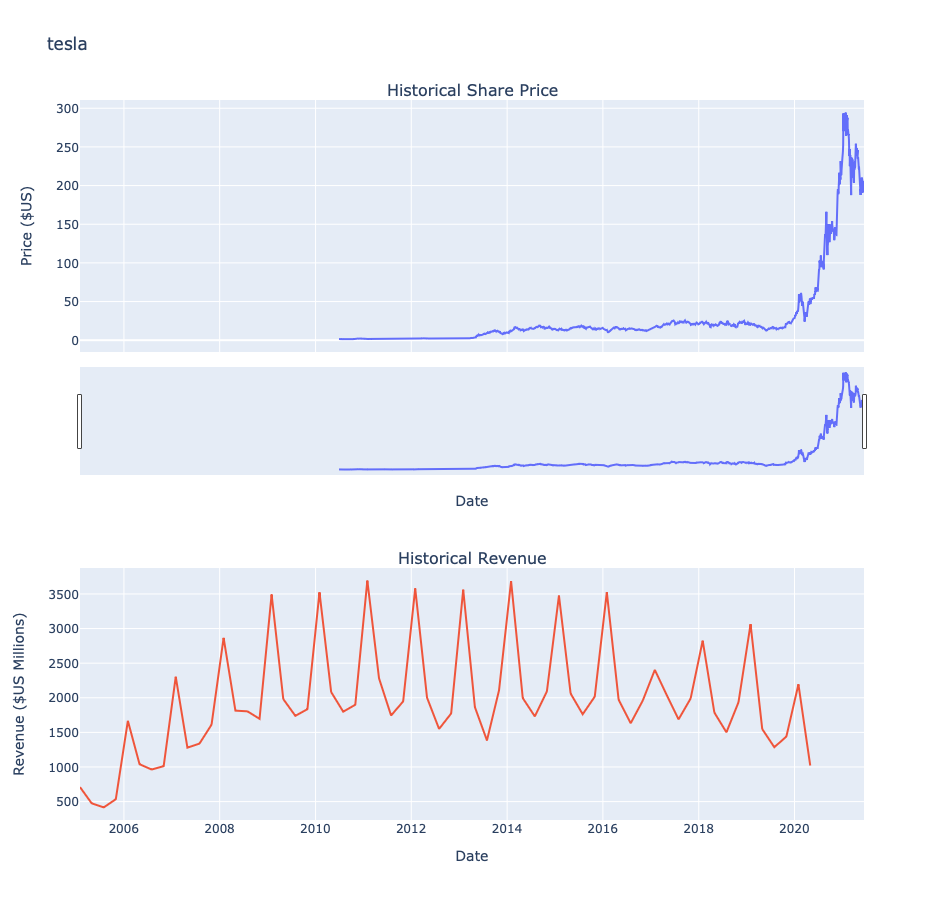

In [50]:
make_graph(tesla_share_price_data, tesla_revenue, 'tesla')

<h1>Question 6: Plot GameStop Stock Graph</h1>

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

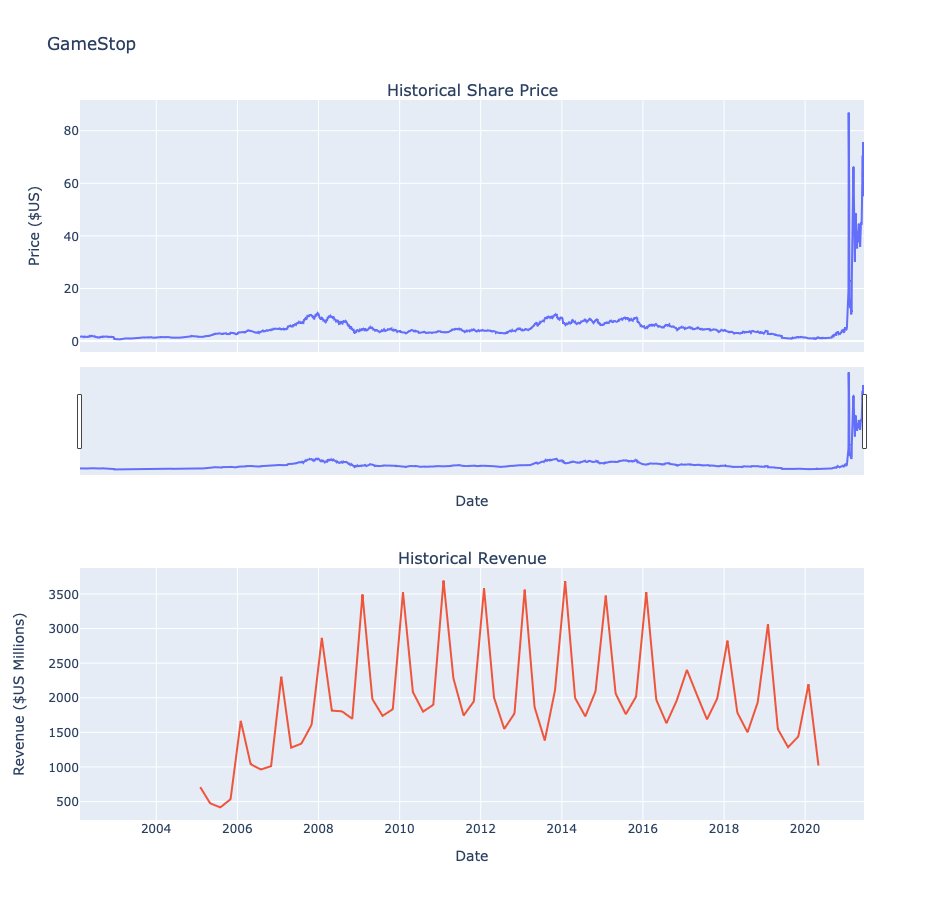

In [51]:
make_graph(gme_data, gme_revenue, 'GameStop')